In [2]:
%pip install sentence-transformers


  Using cached sentence_transformers-2.7.0-py3-none-any.whl.metadata (11 kB)
Using cached sentence_transformers-2.7.0-py3-none-any.whl (171 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import json
from transformers import BertTokenizer, BertModel, BertForSequenceClassification, BertConfig
from sentence_transformers import SentenceTransformer
import torch
from sklearn.model_selection import train_test_split
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import torch.optim as optim
import matplotlib.pyplot as plt
import tqdm


In [13]:
embedding_model = SentenceTransformer('distilbert-base-nli-mean-tokens')



In [15]:
def get_data_lists(data):
    questions = []
    choices = []
    labels = []
    for example in data:
        # print(example.keys())
        questions.append(example['question'])
        choices.append(example['choice_list'])
        labels.append(example['label'])
    return questions, choices, labels

class Brain_Teaser(Dataset):
  def __init__(self, tokenizer, questions, choices, labels, max_len=512):
    self.questions = questions
    self.choices = choices
    self.labels = labels

    self.max_len = max_len
    self.tokenizer = tokenizer
    self.inputs = []
    self.targets = []
    self.question_options_encoded = []

    self.build_questions()
  
  def build_questions(self):
    maxi = 0
    for id in range(len(self.questions)):
      question_options = "Question : " + self.questions[id] + ' ' + "Options 0:" + ' ' + self.choices[id][0] + ' Options 1: ' + self.choices[id][1] + ' Options 2: ' + self.choices[id][2] + ' Options 3: ' + self.choices[id][3]
      self.question_options_encoded.append(self.tokenizer.encode(question_options, convert_to_tensor = True))
    
  def __len__(self):
    return len(self.question_options_encoded)
  
  def __getitem__(self, id):
    return self.question_options_encoded[id],  self.labels[id]
    
  

In [61]:
train_data = np.load("data/SP-train.npy", allow_pickle=True)
test_data = np.load("data/SP_eval_data_for_practice.npy", allow_pickle = True)

train_data, val_data = train_test_split(train_data, test_size=0.15, random_state=42)
train_questions, train_choices, train_labels = get_data_lists(train_data)
val_questions, val_choices, val_labels = get_data_lists(val_data)

In [62]:
train_dataset = Brain_Teaser(embedding_model, train_questions, train_choices, train_labels)
val_dataset = Brain_Teaser(embedding_model, val_questions, val_choices, val_labels)

In [67]:
class SentenceModel(nn.Module):
    def __init__(self):
        super(SentenceModel, self).__init__()
        self.fc_1 = nn.Linear(768, 256)
        self.bn_1 = nn.BatchNorm1d(256)  
        self.dropout_1 = nn.Dropout(0.2)  
        self.fc_2 = nn.Linear(256, 32)
        self.bn_2 = nn.BatchNorm1d(32)  
        self.dropout_2 = nn.Dropout(0.3)  
        self.fc_3 = nn.Linear(32, 4)

    def forward(self, x):
        out = self.fc_1(x)
        out = self.bn_1(out)  
        out = nn.functional.relu(out)  
        out = self.dropout_1(out)  
        out = self.fc_2(out)
        out = self.bn_2(out)  
        out = nn.functional.relu(out)  
        out = self.dropout_2(out) 
        out = self.fc_3(out)
        return out

  0%|          | 0/54 [00:00<?, ?it/s]

100%|██████████| 54/54 [00:00<00:00, 408.01it/s]


Epoch [1/60], Train Loss: 1.3329, Train Accuracy: 31.63% , Val Loss: 1.3083, Val Accuracy: 27.27%


100%|██████████| 54/54 [00:00<00:00, 687.88it/s]


Epoch [2/60], Train Loss: 1.1999, Train Accuracy: 39.77% , Val Loss: 1.2488, Val Accuracy: 25.97%


100%|██████████| 54/54 [00:00<00:00, 556.82it/s]


Epoch [3/60], Train Loss: 1.1441, Train Accuracy: 44.65% , Val Loss: 1.2129, Val Accuracy: 35.06%


100%|██████████| 54/54 [00:00<00:00, 567.88it/s]


Epoch [4/60], Train Loss: 1.1337, Train Accuracy: 41.16% , Val Loss: 1.1883, Val Accuracy: 33.77%


100%|██████████| 54/54 [00:00<00:00, 563.11it/s]


Epoch [5/60], Train Loss: 1.0736, Train Accuracy: 46.74% , Val Loss: 1.1774, Val Accuracy: 45.45%


100%|██████████| 54/54 [00:00<00:00, 593.20it/s]


Epoch [6/60], Train Loss: 1.0326, Train Accuracy: 48.84% , Val Loss: 1.1978, Val Accuracy: 46.75%


100%|██████████| 54/54 [00:00<00:00, 628.00it/s]


Epoch [7/60], Train Loss: 1.0112, Train Accuracy: 54.19% , Val Loss: 1.1034, Val Accuracy: 48.05%


100%|██████████| 54/54 [00:00<00:00, 619.48it/s]


Epoch [8/60], Train Loss: 0.9984, Train Accuracy: 53.49% , Val Loss: 1.1425, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 621.26it/s]


Epoch [9/60], Train Loss: 0.9138, Train Accuracy: 62.33% , Val Loss: 1.1739, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 642.16it/s]


Epoch [10/60], Train Loss: 0.9500, Train Accuracy: 58.60% , Val Loss: 1.1847, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 669.11it/s]


Epoch [11/60], Train Loss: 0.9290, Train Accuracy: 55.81% , Val Loss: 1.2502, Val Accuracy: 38.96%


100%|██████████| 54/54 [00:00<00:00, 676.45it/s]


Epoch [12/60], Train Loss: 0.8822, Train Accuracy: 59.53% , Val Loss: 1.2058, Val Accuracy: 41.56%


100%|██████████| 54/54 [00:00<00:00, 632.13it/s]


Epoch [13/60], Train Loss: 0.8408, Train Accuracy: 62.56% , Val Loss: 1.2479, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 443.11it/s]


Epoch [14/60], Train Loss: 0.8627, Train Accuracy: 63.49% , Val Loss: 1.1813, Val Accuracy: 45.45%


100%|██████████| 54/54 [00:00<00:00, 675.84it/s]


Epoch [15/60], Train Loss: 0.8208, Train Accuracy: 63.02% , Val Loss: 1.2066, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 695.02it/s]


Epoch [16/60], Train Loss: 0.8236, Train Accuracy: 63.95% , Val Loss: 1.2335, Val Accuracy: 45.45%


100%|██████████| 54/54 [00:00<00:00, 651.65it/s]


Epoch [17/60], Train Loss: 0.7915, Train Accuracy: 65.58% , Val Loss: 1.2592, Val Accuracy: 48.05%


100%|██████████| 54/54 [00:00<00:00, 663.92it/s]


Epoch [18/60], Train Loss: 0.8565, Train Accuracy: 61.40% , Val Loss: 1.3506, Val Accuracy: 41.56%


100%|██████████| 54/54 [00:00<00:00, 693.79it/s]


Epoch [19/60], Train Loss: 0.7464, Train Accuracy: 66.74% , Val Loss: 1.4293, Val Accuracy: 40.26%


100%|██████████| 54/54 [00:00<00:00, 708.75it/s]


Epoch [20/60], Train Loss: 0.7449, Train Accuracy: 69.77% , Val Loss: 1.4183, Val Accuracy: 41.56%


100%|██████████| 54/54 [00:00<00:00, 677.80it/s]


Epoch [21/60], Train Loss: 0.8061, Train Accuracy: 65.35% , Val Loss: 1.4239, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 672.07it/s]


Epoch [22/60], Train Loss: 0.7985, Train Accuracy: 64.88% , Val Loss: 1.4354, Val Accuracy: 41.56%


100%|██████████| 54/54 [00:00<00:00, 644.02it/s]


Epoch [23/60], Train Loss: 0.7532, Train Accuracy: 66.51% , Val Loss: 1.4242, Val Accuracy: 40.26%


100%|██████████| 54/54 [00:00<00:00, 681.21it/s]


Epoch [24/60], Train Loss: 0.7301, Train Accuracy: 69.53% , Val Loss: 1.4600, Val Accuracy: 36.36%


100%|██████████| 54/54 [00:00<00:00, 649.59it/s]


Epoch [25/60], Train Loss: 0.6843, Train Accuracy: 70.47% , Val Loss: 1.4824, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 641.86it/s]


Epoch [26/60], Train Loss: 0.6721, Train Accuracy: 70.23% , Val Loss: 1.4398, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 710.84it/s]


Epoch [27/60], Train Loss: 0.6501, Train Accuracy: 73.02% , Val Loss: 1.5349, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 542.47it/s]


Epoch [28/60], Train Loss: 0.6422, Train Accuracy: 73.02% , Val Loss: 1.7051, Val Accuracy: 40.26%


100%|██████████| 54/54 [00:00<00:00, 663.59it/s]


Epoch [29/60], Train Loss: 0.6703, Train Accuracy: 71.40% , Val Loss: 1.6707, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 458.45it/s]


Epoch [30/60], Train Loss: 0.6498, Train Accuracy: 70.93% , Val Loss: 1.5384, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 678.49it/s]


Epoch [31/60], Train Loss: 0.6433, Train Accuracy: 75.58% , Val Loss: 1.5755, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 682.14it/s]


Epoch [32/60], Train Loss: 0.6248, Train Accuracy: 74.65% , Val Loss: 1.6948, Val Accuracy: 41.56%


100%|██████████| 54/54 [00:00<00:00, 698.35it/s]


Epoch [33/60], Train Loss: 0.6542, Train Accuracy: 70.93% , Val Loss: 1.6343, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 656.34it/s]


Epoch [34/60], Train Loss: 0.6498, Train Accuracy: 74.19% , Val Loss: 1.6164, Val Accuracy: 40.26%


100%|██████████| 54/54 [00:00<00:00, 674.41it/s]


Epoch [35/60], Train Loss: 0.6454, Train Accuracy: 72.33% , Val Loss: 1.7342, Val Accuracy: 38.96%


100%|██████████| 54/54 [00:00<00:00, 658.38it/s]


Epoch [36/60], Train Loss: 0.5946, Train Accuracy: 73.72% , Val Loss: 1.6244, Val Accuracy: 41.56%


100%|██████████| 54/54 [00:00<00:00, 626.76it/s]


Epoch [37/60], Train Loss: 0.5817, Train Accuracy: 76.74% , Val Loss: 1.9348, Val Accuracy: 38.96%


100%|██████████| 54/54 [00:00<00:00, 599.74it/s]


Epoch [38/60], Train Loss: 0.6078, Train Accuracy: 76.74% , Val Loss: 1.6350, Val Accuracy: 38.96%


100%|██████████| 54/54 [00:00<00:00, 595.77it/s]


Epoch [39/60], Train Loss: 0.5842, Train Accuracy: 73.26% , Val Loss: 1.5206, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 619.25it/s]


Epoch [40/60], Train Loss: 0.5797, Train Accuracy: 75.81% , Val Loss: 1.7825, Val Accuracy: 45.45%


100%|██████████| 54/54 [00:00<00:00, 643.12it/s]


Epoch [41/60], Train Loss: 0.6136, Train Accuracy: 73.49% , Val Loss: 1.6084, Val Accuracy: 50.65%


100%|██████████| 54/54 [00:00<00:00, 654.89it/s]


Epoch [42/60], Train Loss: 0.5623, Train Accuracy: 76.98% , Val Loss: 1.7258, Val Accuracy: 40.26%


100%|██████████| 54/54 [00:00<00:00, 646.32it/s]


Epoch [43/60], Train Loss: 0.5558, Train Accuracy: 76.98% , Val Loss: 1.8368, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 688.08it/s]


Epoch [44/60], Train Loss: 0.5968, Train Accuracy: 75.58% , Val Loss: 1.7874, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 442.91it/s]


Epoch [45/60], Train Loss: 0.6014, Train Accuracy: 76.28% , Val Loss: 1.7362, Val Accuracy: 41.56%


100%|██████████| 54/54 [00:00<00:00, 693.91it/s]


Epoch [46/60], Train Loss: 0.5522, Train Accuracy: 76.05% , Val Loss: 1.7960, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 684.04it/s]


Epoch [47/60], Train Loss: 0.5513, Train Accuracy: 76.98% , Val Loss: 1.7622, Val Accuracy: 45.45%


100%|██████████| 54/54 [00:00<00:00, 651.05it/s]


Epoch [48/60], Train Loss: 0.5479, Train Accuracy: 76.74% , Val Loss: 1.7253, Val Accuracy: 45.45%


100%|██████████| 54/54 [00:00<00:00, 683.99it/s]


Epoch [49/60], Train Loss: 0.6154, Train Accuracy: 74.42% , Val Loss: 1.9711, Val Accuracy: 46.75%


100%|██████████| 54/54 [00:00<00:00, 670.67it/s]


Epoch [50/60], Train Loss: 0.5644, Train Accuracy: 76.74% , Val Loss: 1.7624, Val Accuracy: 40.26%


100%|██████████| 54/54 [00:00<00:00, 634.88it/s]


Epoch [51/60], Train Loss: 0.4909, Train Accuracy: 80.70% , Val Loss: 1.7653, Val Accuracy: 46.75%


100%|██████████| 54/54 [00:00<00:00, 642.10it/s]


Epoch [52/60], Train Loss: 0.5520, Train Accuracy: 76.98% , Val Loss: 1.7335, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 642.70it/s]


Epoch [53/60], Train Loss: 0.5225, Train Accuracy: 77.67% , Val Loss: 1.7817, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 645.72it/s]


Epoch [54/60], Train Loss: 0.4453, Train Accuracy: 83.02% , Val Loss: 1.8900, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 631.69it/s]


Epoch [55/60], Train Loss: 0.5045, Train Accuracy: 81.63% , Val Loss: 2.1130, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 663.21it/s]


Epoch [56/60], Train Loss: 0.4818, Train Accuracy: 80.70% , Val Loss: 1.9850, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 621.02it/s]


Epoch [57/60], Train Loss: 0.4752, Train Accuracy: 78.84% , Val Loss: 1.9859, Val Accuracy: 44.16%


100%|██████████| 54/54 [00:00<00:00, 636.22it/s]


Epoch [58/60], Train Loss: 0.4570, Train Accuracy: 80.23% , Val Loss: 2.1850, Val Accuracy: 45.45%


100%|██████████| 54/54 [00:00<00:00, 646.54it/s]


Epoch [59/60], Train Loss: 0.5056, Train Accuracy: 77.21% , Val Loss: 1.9768, Val Accuracy: 42.86%


100%|██████████| 54/54 [00:00<00:00, 621.83it/s]


Epoch [60/60], Train Loss: 0.4993, Train Accuracy: 79.30% , Val Loss: 1.8713, Val Accuracy: 42.86%


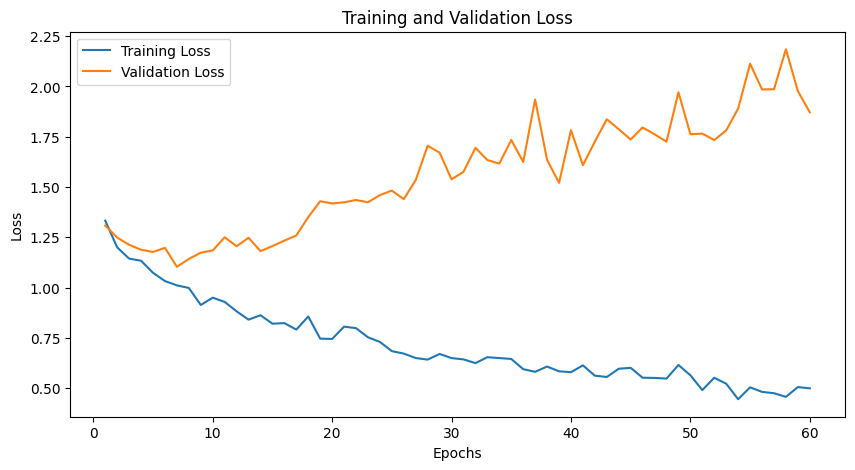

In [70]:
def train(train_dataset, val_dataset, model, epochs=60, learning_rate=5e-3):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    
    train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    val_dataloader = DataLoader(val_dataset, batch_size=8, shuffle=True)
    
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        t_correct = 0
        t_total = 0
        for inputs, targets in tqdm.tqdm(train_dataloader):
            inputs = inputs.to(device)
            targets = targets.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if torch.cuda.is_available():
                torch.cuda.empty_cache()
            _, predicted = torch.max(outputs, 1)
            t_total += targets.size(0)
            t_correct += (predicted == targets).sum().item()
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in val_dataloader:
                inputs = inputs.to(device)
                targets = targets.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()

                _, predicted = torch.max(outputs, 1)
                total += targets.size(0)
                correct += (predicted == targets).sum().item()

        train_loss = running_loss / len(train_dataloader)
        val_loss = val_loss / len(val_dataloader)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{epochs}], "
              f"Train Loss: {train_loss:.4f}, "
                f"Train Accuracy: {(100 * t_correct / t_total):.2f}% , "
              f"Val Loss: {val_loss:.4f}, "
              f"Val Accuracy: {(100 * correct / total):.2f}%")

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.plot(range(1, epochs + 1), train_losses, label='Training Loss')
    plt.plot(range(1, epochs + 1), val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

# Example usage:
model_gru = SentenceModel()
train(train_dataset, val_dataset, model_gru)
